In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","population_unit", "complete_network", "supercomputer", "networks")

In [3]:
folder = "connectivity"

In [4]:
e = Experiments()
e.add_experiment(name="p0125",
                 color="black",
                 label="p=0.125",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p0125"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5")
e.add_experiment(name="p025",
                 color="blue",
                 label="p=0.25",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p025"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5")
e.add_experiment(name="p05",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")

In [5]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p0125/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-44-09_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p025/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-45-19_p1.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5


In [6]:
colors = ["grey","green" ,"blue"]

In [7]:
%%time
neuron_type = "dSPN"
connectivity_dspn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300)

CPU times: user 4min 43s, sys: 22.2 s, total: 5min 5s
Wall time: 5min 6s


In [18]:
tmp = [3236,
 3368,
 3487,
 4155,
 4156,
 4395,
 5259,
 5672,
 5674,
 7300,
 7576,
 8319,
 9121,
 9618,
 11679,
 11723,
 13166,
 13554,
 15201,
 15433,
 15660,
 15905,
 17966,
 18595,
 18596,
 18913,
 18972,
 27606,
 30862,
 32120,
 33637,
 33681,
 35413,
 36603,
 39127]

In [19]:
for t in tmp:
    if t in connectivity_dspn['p05'].keys():
        print(t)

3368


In [23]:
sum([*connectivity_dspn['p05'][3368].values()])

679

In [8]:
%%time
neuron_type = "iSPN"
connectivity_ispn = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS"], post=neuron_type, max_post=300)

CPU times: user 4min 35s, sys: 38.1 s, total: 5min 13s
Wall time: 5min 13s


In [9]:
connectivity = {i : dict() for i in [*e.experiments.keys()]}

In [10]:
for v, k in connectivity_dspn.items():
    connectivity[v].update(k)

In [11]:
for v, k in connectivity_ispn.items():
    connectivity[v].update(k)

In [12]:
customize = {plt.ylim:(0,140)}

In [13]:
name = "synapses_incoming_all_SPN"

In [21]:
customize = {plt.ylim:(0,400)}

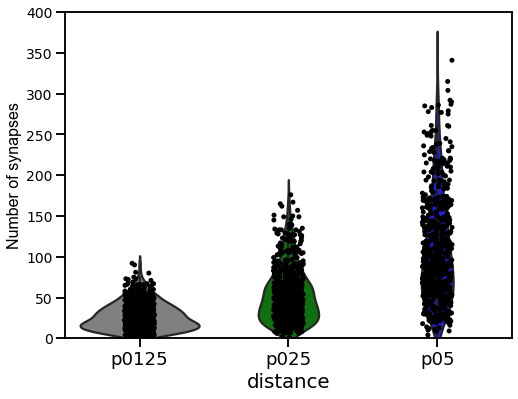

In [23]:
plot_synapses_violin(connectivity, experiment_names=e, colors=colors, name=name, folder=folder, save=True, customize=customize)